# Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU, Dropout
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

# Task A : Read Matlab Data, Divide Data, and Plot Input

In [2]:
# Load notMNIST Data
notFashion_mnist = loadmat('notMNIST_small')

print(notFashion_mnist.keys())

X = notFashion_mnist['images']
X = X.transpose()
print('\nImages shape : ', X.shape)

Y = notFashion_mnist['labels']
print('Labels shape : ', Y.shape)

train_images, test_images, train_labels, test_labels = train_test_split(
    X, Y, test_size=0.25, random_state=42)

print('\nAfter splitting data : ')
print('Train images shape : ', train_images.shape)
print('Train labels shape : ', train_labels.shape)
print('Test images shape : ', test_images.shape)
print('Test labels shape : ', test_labels.shape)

dict_keys(['__header__', '__version__', '__globals__', 'images', 'labels'])

Images shape :  (18724, 28, 28)
Labels shape :  (18724,)

After splitting data : 
Train images shape :  (14043, 28, 28)
Train labels shape :  (14043,)
Test images shape :  (4681, 28, 28)
Test labels shape :  (4681,)



First  15   train  images


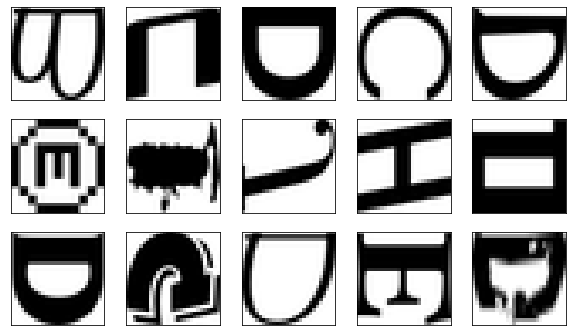


First  15   test  images


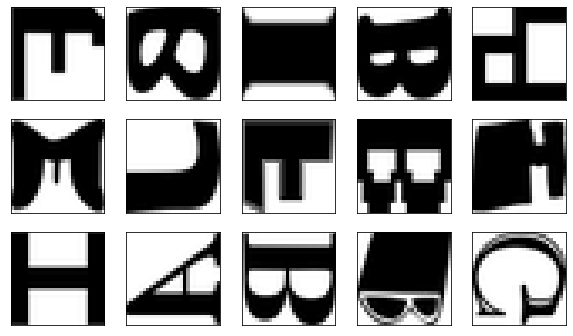

In [3]:
def printImages(type, n, X):
    print('\nFirst ', n, ' ', type, ' images')
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
    plt.show()
    
printImages('train', 15, train_images)
printImages('test', 15, test_images)

# Task B : Mean Subtraction and Normalization

In [4]:
# Pixel values
train_min = train_images.min()
test_min = test_images.min()

train_max = train_images.max()
test_max = test_images.max()

train_mean = train_images.mean()
test_mean = test_images.mean()

train_std = train_images.std()
test_std = test_images.std()

print('Original Pixel Value')
print('Train :\nMin: ', train_min, " Max: ", train_max, " Mean: ", train_mean, " Std: ", train_std)
print('Test :\nMin: ', test_min, " Max: ", test_max, " Mean: ", test_mean, " Std: ", test_std)

Original Pixel Value
Train :
Min:  0.0  Max:  255.0  Mean:  108.3942622658976  Std:  116.93016352966536
Test :
Min:  0.0  Max:  255.0  Mean:  108.68820328815141  Std:  117.00370610295343


In [5]:
# Mean Subtraction
train_images = train_images - train_mean
test_images = test_images - test_mean

In [6]:
# Normalization
train_images = train_images / train_std
test_images = test_images / test_std

In [7]:
# Pixel values
print('New Pixel Value')
print('Train :\nMin: ', train_images.min(), " Max: " ,train_images.max(), " Mean: " ,train_images.mean(), " Std: " ,train_images.std())
print('Test :\nMin: ', test_images.min(), " Max: " ,test_images.max(), " Mean: " ,test_images.mean(), " Std: " ,test_images.std())

New Pixel Value
Train :
Min:  -0.9270000057632504  Max:  1.2537888711402367  Mean:  2.822625795407159e-17  Std:  1.0000000000000007
Test :
Min:  -0.9289295776025669  Max:  1.2504885664314471  Mean:  -2.3915132036447703e-17  Std:  1.0


# Task C : Xavier and He Initalization Experiment

**Xavier Initialization**

In [8]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.4599 - acc: 0.8698
Epoch 2/10
14043/14043 [==============================] - 1s 78us/sample - loss: 0.2924 - acc: 0.9150
Epoch 3/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.2237 - acc: 0.9327
Epoch 4/10
14043/14043 [==============================] - 1s 76us/sample - loss: 0.1783 - acc: 0.9464
Epoch 5/10
14043/14043 [==============================] - 1s 80us/sample - loss: 0.1418 - acc: 0.9571
Epoch 6/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.1214 - acc: 0.9640
Epoch 7/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.0975 - acc: 0.9705
Epoch 8/10
14043/14043 [==============================] - 1s 76us/sample - loss: 0.0815 - acc: 0.9762
Epoch 9/10
14043/14043 [==============================] - 1s 76us/sample - loss:

In [9]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - ETA: 0s - loss: 1.4323 - acc: 0.425 - 4s 286us/sample - loss: 1.4295 - acc: 0.4271
Epoch 2/10
14043/14043 [==============================] - 4s 271us/sample - loss: 0.6983 - acc: 0.7977
Epoch 3/10
14043/14043 [==============================] - 4s 270us/sample - loss: 0.5672 - acc: 0.8465
Epoch 4/10
14043/14043 [==============================] - 4s 309us/sample - loss: 0.6186 - acc: 0.8238
Epoch 5/10
14043/14043 [==============================] - 5s 321us/sample - loss: 0.6002 - acc: 0.8159
Epoch 6/10
14043/14043 [==============================] - 4s 265us/sample - loss: 0.5405 - acc: 0.8358
Epoch 7/10
14043/14043 [==============================] - 4s 259us/sample - loss: 0.5166 - acc: 0.8593
Epoch 8/10
14043/14043 [==============================] - 4s 289us/sample - loss: 0.4521 - acc: 0.8712
Epoch 9/10
14043/14043 [==============================] - 5s 321us/sample - loss: 0.4333 - acc: 0.8747
Epoch 10/10


In [10]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu', kernel_initializer='glorot_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 635us/sample - loss: 0.6430 - acc: 0.8585
Epoch 2/10
14043/14043 [==============================] - 10s 682us/sample - loss: 0.3480 - acc: 0.9124
Epoch 3/10
14043/14043 [==============================] - 9s 646us/sample - loss: 0.3008 - acc: 0.9245
Epoch 4/10
14043/14043 [==============================] - 9s 670us/sample - loss: 0.2982 - acc: 0.9314
Epoch 5/10
14043/14043 [==============================] - 9s 627us/sample - loss: 0.2939 - acc: 0.9383 0s - loss: 0.2929 - acc: 0.9
Epoch 6/10
14043/14043 [==============================] - 9s 622us/sample - loss: 0.2437 - acc: 0.9460
Epoch 7/10
14043/14043 [==============================] - 9s 632us/sample - loss: 0.2315 - acc: 0.9534
Epoch 8/10
14043/14043 [==============================] - 9s 629us/sample - loss: 0.2576 - acc: 0.9526
Epoch 9/10
14043/14043 [==============================] - 9s 619us/sample - loss: 0.2184 - acc: 0.9606
Epoch 10/10
14043/14

**He Initialization**

In [11]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 78us/sample - loss: 0.4758 - acc: 0.8661
Epoch 2/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.2865 - acc: 0.9181
Epoch 3/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.2204 - acc: 0.9354
Epoch 4/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.1790 - acc: 0.9451
Epoch 5/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.1385 - acc: 0.9580
Epoch 6/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.1165 - acc: 0.9647
Epoch 7/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.0949 - acc: 0.9715
Epoch 8/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.0794 - acc: 0.9768
Epoch 9/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.0733 - acc: 0.9771
Epoch 10/10
14043/14043 [==============================] - 

In [12]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 264us/sample - loss: 0.7461 - acc: 0.7707
Epoch 2/10
14043/14043 [==============================] - 4s 255us/sample - loss: 0.4503 - acc: 0.8745
Epoch 3/10
14043/14043 [==============================] - 4s 255us/sample - loss: 0.3708 - acc: 0.8933
Epoch 4/10
14043/14043 [==============================] - 4s 251us/sample - loss: 0.3570 - acc: 0.8994
Epoch 5/10
14043/14043 [==============================] - 4s 252us/sample - loss: 0.3311 - acc: 0.9064
Epoch 6/10
14043/14043 [==============================] - 4s 253us/sample - loss: 0.3439 - acc: 0.9032
Epoch 7/10
14043/14043 [==============================] - 4s 255us/sample - loss: 0.2990 - acc: 0.9099
Epoch 8/10
14043/14043 [==============================] - 4s 254us/sample - loss: 0.2863 - acc: 0.9142
Epoch 9/10
14043/14043 [==============================] - 4s 262us/sample - loss: 0.2574 - acc: 0.9230
Epoch 10/10
14043/14043 [=========================

In [13]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 619us/sample - loss: 0.7347 - acc: 0.8556: 2s - l - ETA: 0s - loss: 0.746
Epoch 2/10
14043/14043 [==============================] - 9s 644us/sample - loss: 0.3597 - acc: 0.9139
Epoch 3/10
14043/14043 [==============================] - 9s 629us/sample - loss: 0.3134 - acc: 0.9257
Epoch 4/10
14043/14043 [==============================] - 9s 636us/sample - loss: 0.2810 - acc: 0.9369
Epoch 5/10
14043/14043 [==============================] - 9s 615us/sample - loss: 0.2716 - acc: 0.9399
Epoch 6/10
14043/14043 [==============================] - 9s 620us/sample - loss: 0.2609 - acc: 0.9474
Epoch 7/10
14043/14043 [==============================] - 9s 616us/sample - loss: 0.2678 - acc: 0.9541
Epoch 8/10
14043/14043 [==============================] - 9s 619us/sample - loss: 0.2093 - acc: 0.9616
Epoch 9/10
14043/14043 [==============================] - 9s 623us/sample - loss: 0.2177 - acc: 0.9611s - loss:
Epoch 10/

# Task D : Network Configuration Experiment

**First Model** : Normal Implementation for Fashion MNIST Dataset

In [14]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 77us/sample - loss: 0.4766 - acc: 0.8639
Epoch 2/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2963 - acc: 0.9166
Epoch 3/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2303 - acc: 0.9316
Epoch 4/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.1833 - acc: 0.9440
Epoch 5/10
14043/14043 [==============================] - ETA: 0s - loss: 0.1440 - acc: 0.956 - 1s 73us/sample - loss: 0.1445 - acc: 0.9559
Epoch 6/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1158 - acc: 0.9645
Epoch 7/10
14043/14043 [==============================] - 1s 77us/sample - loss: 0.0974 - acc: 0.9710
Epoch 8/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.0840 - acc: 0.9752
Epoch 9/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.0753 - acc: 0.9763
Epoch 10/10
14043/140

**Second Model** : Large Number of Layer

In [16]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 269us/sample - loss: 1.1234 - acc: 0.5616
Epoch 2/10
14043/14043 [==============================] - 4s 259us/sample - loss: 0.5584 - acc: 0.8355
Epoch 3/10
14043/14043 [==============================] - 4s 255us/sample - loss: 0.5025 - acc: 0.8480
Epoch 4/10
14043/14043 [==============================] - 4s 256us/sample - loss: 0.3789 - acc: 0.8863
Epoch 5/10
14043/14043 [==============================] - 4s 259us/sample - loss: 0.4316 - acc: 0.8729
Epoch 6/10
14043/14043 [==============================] - 4s 256us/sample - loss: 0.4118 - acc: 0.8830
Epoch 7/10
14043/14043 [==============================] - 4s 259us/sample - loss: 0.3214 - acc: 0.9084
Epoch 8/10
14043/14043 [==============================] - 4s 258us/sample - loss: 0.2844 - acc: 0.9155
Epoch 9/10
14043/14043 [==============================] - 4s 291us/sample - loss: 0.3745 - acc: 0.8877
Epoch 10/10
14043/14043 [=========================

**Third Model** : Large number of neurons

In [18]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2560)              2009600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                25610     
Total params: 2,035,210
Trainable params: 2,035,210
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 635us/sample - loss: 0.6387 - acc: 0.8622
Epoch 2/10
14043/14043 [==============================] - 9s 633us/sample - loss: 0.3560 - acc: 0.9103
Epoch 3/10
14043/14043 [==============================] - 9s 624us/sample - loss: 0.3376 - acc: 0.9223
Epoch 4/10
14043/14043 [==============================] - 9s 636us/sample - loss: 0.2715 - acc: 0.9342s - loss: 0.2621 - ac - ETA: 2s - - ETA: 0s - loss: 0.2738 - acc
Epoch 5/10
14043/14043 [==============================] - 9s 628us/sample - loss: 0.2819 - acc: 0.9382s - - ETA: 3s 
Epoch 6/10
14043/14043 [==============================] - 9s 652us/sample - loss: 0.2423 - acc: 0.9477
Epoch 7/10
14043/14043 [==============================] - 9s 652us/sample - loss: 0.2391 - acc: 0.9544
Epoch 8/10
14043/14043 [==============================] - 9s 636us/sample - loss: 0.2268 - acc: 0.9571
Epoch 9/10
14043/14043 [==============================] - 9s 642us/sample -

# Task E : Gradient Optimization Techniques Experiment 

**Adam**

In [20]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 78us/sample - loss: 0.4742 - acc: 0.8695
Epoch 2/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2895 - acc: 0.9164
Epoch 3/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2215 - acc: 0.9353
Epoch 4/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.1779 - acc: 0.9465
Epoch 5/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1391 - acc: 0.9578
Epoch 6/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1214 - acc: 0.9635
Epoch 7/10
14043/14043 [==============================] - 1s 76us/sample - loss: 0.0934 - acc: 0.9734
Epoch 8/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.0824 - acc: 0.9746
Epoch 9/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.0647 - acc: 0.9809
Epoch 10/10
14043/14043 [==============================] - 

In [21]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 268us/sample - loss: 1.4196 - acc: 0.4244
Epoch 2/10
14043/14043 [==============================] - 4s 258us/sample - loss: 0.7049 - acc: 0.7911
Epoch 3/10
14043/14043 [==============================] - 4s 255us/sample - loss: 0.5382 - acc: 0.8513
Epoch 4/10
14043/14043 [==============================] - 4s 257us/sample - loss: 0.4164 - acc: 0.8817
Epoch 5/10
14043/14043 [==============================] - 4s 253us/sample - loss: 0.3861 - acc: 0.8898
Epoch 6/10
14043/14043 [==============================] - 4s 254us/sample - loss: 0.4138 - acc: 0.8810
Epoch 7/10
14043/14043 [==============================] - 4s 253us/sample - loss: 0.3825 - acc: 0.8945
Epoch 8/10
14043/14043 [==============================] - 4s 258us/sample - loss: 0.5088 - acc: 0.8462
Epoch 9/10
14043/14043 [==============================] - 4s 256us/sample - loss: 0.6708 - acc: 0.7701
Epoch 10/10
14043/14043 [=========================

In [22]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 640us/sample - loss: 0.6288 - acc: 0.8662s - loss: 1. -  - ETA: 0s - loss: 0.6338 - acc: 0.8
Epoch 2/10
14043/14043 [==============================] - 9s 624us/sample - loss: 0.3748 - acc: 0.9103s - loss: 0.3761
Epoch 3/10
14043/14043 [==============================] - 9s 632us/sample - loss: 0.3169 - acc: 0.9227
Epoch 4/10
14043/14043 [==============================] - 9s 671us/sample - loss: 0.2848 - acc: 0.9333s - loss: 0.2748 - a
Epoch 5/10
14043/14043 [==============================] - 9s 647us/sample - loss: 0.2901 - acc: 0.9378
Epoch 6/10
14043/14043 [==============================] - 9s 642us/sample - loss: 0.2537 - acc: 0.9464
Epoch 7/10
14043/14043 [==============================] - 9s 629us/sample - loss: 0.2297 - acc: 0.9534s - 
Epoch 8/10
14043/14043 [==============================] - 9s 631us/sample - loss: 0.2416 - acc: 0.9546
Epoch 9/10
14043/14043 [==============================] - 9s 6

**RMSprop**

In [23]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 92us/sample - loss: 0.4658 - acc: 0.8708
Epoch 2/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.3021 - acc: 0.9153
Epoch 3/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.2342 - acc: 0.9323
Epoch 4/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.1886 - acc: 0.9447
Epoch 5/10
14043/14043 [==============================] - 1s 88us/sample - loss: 0.1466 - acc: 0.9559
Epoch 6/10
14043/14043 [==============================] - 1s 84us/sample - loss: 0.1225 - acc: 0.9622
Epoch 7/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.1027 - acc: 0.9688
Epoch 8/10
14043/14043 [==============================] - 1s 85us/sample - loss: 0.0807 - acc: 0.9756
Epoch 9/10
14043/14043 [==============================] - 1s 87us/sample - loss: 0.0718 - acc: 0.9789
Epoch 10/10
14043/14043 [==============================] - 

In [24]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 307us/sample - loss: 1.1945 - acc: 0.5425
Epoch 2/10
14043/14043 [==============================] - 4s 278us/sample - loss: 0.5889 - acc: 0.8318
Epoch 3/10
14043/14043 [==============================] - 4s 278us/sample - loss: 0.4459 - acc: 0.8746
Epoch 4/10
14043/14043 [==============================] - 4s 284us/sample - loss: 0.3853 - acc: 0.8933
Epoch 5/10
14043/14043 [==============================] - 4s 277us/sample - loss: 0.3674 - acc: 0.8965
Epoch 6/10
14043/14043 [==============================] - 4s 281us/sample - loss: 0.3359 - acc: 0.9088
Epoch 7/10
14043/14043 [==============================] - 4s 279us/sample - loss: 0.3327 - acc: 0.9091
Epoch 8/10
14043/14043 [==============================] - 4s 278us/sample - loss: 0.3394 - acc: 0.9098
Epoch 9/10
14043/14043 [==============================] - 4s 278us/sample - loss: 0.3246 - acc: 0.9118
Epoch 10/10
14043/14043 [=========================

In [25]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.7747 - acc: 0.8530
Epoch 2/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.4603 - acc: 0.9003
Epoch 3/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.3516 - acc: 0.9235
Epoch 4/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.3025 - acc: 0.9360
Epoch 5/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.2562 - acc: 0.9478
Epoch 6/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.2293 - acc: 0.9564
Epoch 7/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.2165 - acc: 0.9596
Epoch 8/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.1773 - acc: 0.9671
Epoch 9/10
14043/14043 [==============================] - 15s 1ms/sample - loss: 0.1736 - acc: 0.9682
Epoch 10/10
14043/14043 [==============================] - 

# Task F : Activation Functions Experiment

**ReLU**

In [26]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 79us/sample - loss: 0.4600 - acc: 0.8697
Epoch 2/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2844 - acc: 0.9177
Epoch 3/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.2190 - acc: 0.9346
Epoch 4/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.1755 - acc: 0.9477
Epoch 5/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.1421 - acc: 0.9580
Epoch 6/10
14043/14043 [==============================] - 1s 78us/sample - loss: 0.1150 - acc: 0.9654
Epoch 7/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.0940 - acc: 0.9724
Epoch 8/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.0886 - acc: 0.9716
Epoch 9/10
14043/14043 [==============================] - 1s 72us/sample - loss: 0.0704 - acc: 0.9794
Epoch 10/10
14043/14043 [==============================] - 

In [27]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 269us/sample - loss: 1.3730 - acc: 0.4534
Epoch 2/10
14043/14043 [==============================] - 4s 258us/sample - loss: 0.8577 - acc: 0.7269
Epoch 3/10
14043/14043 [==============================] - 4s 254us/sample - loss: 0.5836 - acc: 0.8371
Epoch 4/10
14043/14043 [==============================] - 4s 257us/sample - loss: 0.5573 - acc: 0.8473
Epoch 5/10
14043/14043 [==============================] - 4s 268us/sample - loss: 0.4524 - acc: 0.8732
Epoch 6/10
14043/14043 [==============================] - 4s 254us/sample - loss: 0.4305 - acc: 0.8798
Epoch 7/10
14043/14043 [==============================] - 4s 258us/sample - loss: 0.4760 - acc: 0.8638
Epoch 8/10
14043/14043 [==============================] - 4s 253us/sample - loss: 0.4832 - acc: 0.8616
Epoch 9/10
14043/14043 [==============================] - 4s 256us/sample - loss: 0.5026 - acc: 0.8554
Epoch 10/10
14043/14043 [=========================

In [28]:
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2560, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 650us/sample - loss: 0.6348 - acc: 0.8612
Epoch 2/10
14043/14043 [==============================] - 9s 658us/sample - loss: 0.3678 - acc: 0.9093
Epoch 3/10
14043/14043 [==============================] - 9s 648us/sample - loss: 0.3284 - acc: 0.9196
Epoch 4/10
14043/14043 [==============================] - 9s 648us/sample - loss: 0.2945 - acc: 0.9310
Epoch 5/10
14043/14043 [==============================] - 9s 658us/sample - loss: 0.2630 - acc: 0.9416
Epoch 6/10
14043/14043 [==============================] - 9s 651us/sample - loss: 0.2649 - acc: 0.9434
Epoch 7/10
14043/14043 [==============================] - 9s 651us/sample - loss: 0.2346 - acc: 0.9506
Epoch 8/10
14043/14043 [==============================] - 9s 648us/sample - loss: 0.2411 - acc: 0.9563
Epoch 9/10
14043/14043 [==============================] - 9s 669us/sample - loss: 0.1677 - acc: 0.9672
Epoch 10/10
14043/14043 [=========================

**Leaky ReLU**

In [29]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 78us/sample - loss: 0.5071 - acc: 0.8601
Epoch 2/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.3560 - acc: 0.9014
Epoch 3/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.2922 - acc: 0.9155
Epoch 4/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.2520 - acc: 0.9278
Epoch 5/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.2228 - acc: 0.9346
Epoch 6/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1977 - acc: 0.9405
Epoch 7/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1792 - acc: 0.9452
Epoch 8/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.1576 - acc: 0.9526
Epoch 9/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.1414 - acc: 0.9568
Epoch 10/10
14043/14043 [==============================] - 

In [30]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 288us/sample - loss: 0.8118 - acc: 0.7174
Epoch 2/10
14043/14043 [==============================] - 4s 274us/sample - loss: 0.5178 - acc: 0.8478
Epoch 3/10
14043/14043 [==============================] - 4s 275us/sample - loss: 0.4263 - acc: 0.8853
Epoch 4/10
14043/14043 [==============================] - 4s 275us/sample - loss: 0.3843 - acc: 0.8957
Epoch 5/10
14043/14043 [==============================] - 4s 274us/sample - loss: 0.3489 - acc: 0.9034
Epoch 6/10
14043/14043 [==============================] - 4s 290us/sample - loss: 0.3507 - acc: 0.9025
Epoch 7/10
14043/14043 [==============================] - 4s 275us/sample - loss: 0.3665 - acc: 0.9000
Epoch 8/10
14043/14043 [==============================] - 4s 285us/sample - loss: 0.3421 - acc: 0.9058
Epoch 9/10
14043/14043 [==============================] - 4s 278us/sample - loss: 0.3308 - acc: 0.9098
Epoch 10/10
14043/14043 [=========================

In [31]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(2560))
model.add(LeakyReLU(alpha=0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 9s 653us/sample - loss: 0.7313 - acc: 0.8477
Epoch 2/10
14043/14043 [==============================] - 9s 655us/sample - loss: 0.4315 - acc: 0.8849s - loss: 0.4338 - a
Epoch 3/10
14043/14043 [==============================] - 9s 676us/sample - loss: 0.3996 - acc: 0.8960
Epoch 4/10
14043/14043 [==============================] - 9s 665us/sample - loss: 0.3638 - acc: 0.9014
Epoch 5/10
14043/14043 [==============================] - 9s 663us/sample - loss: 0.3487 - acc: 0.9111
Epoch 6/10
14043/14043 [==============================] - 9s 659us/sample - loss: 0.3269 - acc: 0.9148
Epoch 7/10
14043/14043 [==============================] - 9s 661us/sample - loss: 0.2991 - acc: 0.9207
Epoch 8/10
14043/14043 [==============================] - 9s 658us/sample - loss: 0.2974 - acc: 0.9212
Epoch 9/10
14043/14043 [==============================] - 9s 666us/sample - loss: 0.2521 - acc: 0.9319
Epoch 10/10
14043/14043 [=====

# Task G : Regularization Techniques Experiment

**Dropout**

In [32]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 89us/sample - loss: 0.6739 - acc: 0.8154
Epoch 2/10
14043/14043 [==============================] - 1s 82us/sample - loss: 0.4684 - acc: 0.8745
Epoch 3/10
14043/14043 [==============================] - 1s 84us/sample - loss: 0.4065 - acc: 0.8883
Epoch 4/10
14043/14043 [==============================] - 1s 86us/sample - loss: 0.3775 - acc: 0.8920
Epoch 5/10
14043/14043 [==============================] - 1s 81us/sample - loss: 0.3445 - acc: 0.8996
Epoch 6/10
14043/14043 [==============================] - 1s 81us/sample - loss: 0.3370 - acc: 0.9057
Epoch 7/10
14043/14043 [==============================] - 1s 81us/sample - loss: 0.3183 - acc: 0.9088
Epoch 8/10
14043/14043 [==============================] - 1s 81us/sample - loss: 0.3021 - acc: 0.9104
Epoch 9/10
14043/14043 [==============================] - 1s 81us/sample - loss: 0.2944 - acc: 0.9135
Epoch 10/10
14043/14043 [==============================] - 

In [33]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 4s 258us/sample - loss: 2.2925 - acc: 0.1337
Epoch 2/10
14043/14043 [==============================] - 3s 238us/sample - loss: 2.0221 - acc: 0.2056
Epoch 3/10
14043/14043 [==============================] - 3s 240us/sample - loss: 1.8828 - acc: 0.2252
Epoch 4/10
14043/14043 [==============================] - 3s 238us/sample - loss: 1.8168 - acc: 0.2456
Epoch 5/10
14043/14043 [==============================] - 3s 238us/sample - loss: 1.7825 - acc: 0.2695
Epoch 6/10
14043/14043 [==============================] - 3s 241us/sample - loss: 1.7565 - acc: 0.2816
Epoch 7/10
14043/14043 [==============================] - 3s 249us/sample - loss: 1.6922 - acc: 0.3117
Epoch 8/10
14043/14043 [==============================] - 3s 240us/sample - loss: 1.6602 - acc: 0.3251
Epoch 9/10
14043/14043 [==============================] - 3s 241us/sample - loss: 1.6291 - acc: 0.3330
Epoch 10/10
14043/14043 [=========================

In [34]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(1280, activation='relu'))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 5s 360us/sample - loss: 0.7205 - acc: 0.8396
Epoch 2/10
14043/14043 [==============================] - 5s 355us/sample - loss: 0.5325 - acc: 0.8777
Epoch 3/10
14043/14043 [==============================] - 5s 360us/sample - loss: 0.4465 - acc: 0.8990
Epoch 4/10
14043/14043 [==============================] - 5s 357us/sample - loss: 0.4487 - acc: 0.9031
Epoch 5/10
14043/14043 [==============================] - 5s 358us/sample - loss: 0.4276 - acc: 0.9051
Epoch 6/10
14043/14043 [==============================] - 5s 360us/sample - loss: 0.4234 - acc: 0.9126
Epoch 7/10
14043/14043 [==============================] - 5s 362us/sample - loss: 0.4015 - acc: 0.9185
Epoch 8/10
14043/14043 [==============================] - 5s 361us/sample - loss: 0.4011 - acc: 0.9204
Epoch 9/10
14043/14043 [==============================] - 5s 360us/sample - loss: 0.3936 - acc: 0.9275
Epoch 10/10
14043/14043 [=========================

**L1**

In [35]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 1s 80us/sample - loss: 0.8814 - acc: 0.8661
Epoch 2/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.6017 - acc: 0.9107
Epoch 3/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.5006 - acc: 0.9283
Epoch 4/10
14043/14043 [==============================] - 1s 79us/sample - loss: 0.4429 - acc: 0.9371
Epoch 5/10
14043/14043 [==============================] - 1s 75us/sample - loss: 0.3987 - acc: 0.9471
Epoch 6/10
14043/14043 [==============================] - 1s 74us/sample - loss: 0.3616 - acc: 0.9535
Epoch 7/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.3339 - acc: 0.9596
Epoch 8/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.3292 - acc: 0.9596
Epoch 9/10
14043/14043 [==============================] - 1s 73us/sample - loss: 0.2878 - acc: 0.9693
Epoch 10/10
14043/14043 [==============================] - 

In [36]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(128, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 3s 190us/sample - loss: 2.3708 - acc: 0.1016
Epoch 2/10
14043/14043 [==============================] - 2s 174us/sample - loss: 2.3147 - acc: 0.1015
Epoch 3/10
14043/14043 [==============================] - 2s 177us/sample - loss: 2.3072 - acc: 0.1001
Epoch 4/10
14043/14043 [==============================] - 2s 174us/sample - loss: 2.3048 - acc: 0.1007
Epoch 5/10
14043/14043 [==============================] - 2s 174us/sample - loss: 2.3038 - acc: 0.0957
Epoch 6/10
14043/14043 [==============================] - 2s 173us/sample - loss: 2.3036 - acc: 0.0996
Epoch 7/10
14043/14043 [==============================] - 2s 176us/sample - loss: 2.3033 - acc: 0.1007
Epoch 8/10
14043/14043 [==============================] - 2s 176us/sample - loss: 2.3034 - acc: 0.1005
Epoch 9/10
14043/14043 [==============================] - 2s 176us/sample - loss: 2.3033 - acc: 0.0995
Epoch 10/10
14043/14043 [=========================

In [37]:
tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(1280, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 14043 samples
Epoch 1/10
14043/14043 [==============================] - 5s 342us/sample - loss: 1.3880 - acc: 0.8728
Epoch 2/10
14043/14043 [==============================] - 5s 338us/sample - loss: 0.7455 - acc: 0.9091
Epoch 3/10
14043/14043 [==============================] - 5s 337us/sample - loss: 0.5795 - acc: 0.9269
Epoch 4/10
14043/14043 [==============================] - 5s 334us/sample - loss: 0.4863 - acc: 0.9375
Epoch 5/10
14043/14043 [==============================] - 5s 334us/sample - loss: 0.4294 - acc: 0.9492
Epoch 6/10
14043/14043 [==============================] - 5s 335us/sample - loss: 0.3886 - acc: 0.9549
Epoch 7/10
14043/14043 [==============================] - 5s 344us/sample - loss: 0.3636 - acc: 0.9603
Epoch 8/10
14043/14043 [==============================] - 5s 337us/sample - loss: 0.3495 - acc: 0.9638
Epoch 9/10
14043/14043 [==============================] - 5s 345us/sample - loss: 0.3468 - acc: 0.9665
Epoch 10/10
14043/14043 [=========================